In [2]:
import zipfile
import os

# Đường dẫn file zip
zip_path = '/content/drive/MyDrive/cat_dog_images.zip'

# Đường dẫn thư mục để giải nén
extract_path = '/content/drive/MyDrive/cat_dog_images'

# Tạo thư mục nếu chưa có
os.makedirs(extract_path, exist_ok=True)

# Giải nén
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Đã giải nén xong!")


✅ Đã giải nén xong!


In [11]:
import pathlib
imgdir_path = pathlib.Path('/content/drive/MyDrive/cat_dog_images')
file_list = sorted([str(path) for path in imgdir_path.glob('*.jpg')])

print(file_list)

['/content/drive/MyDrive/cat_dog_images/Bản sao của 12492 (1).jpg', '/content/drive/MyDrive/cat_dog_images/Bản sao của 12492.jpg', '/content/drive/MyDrive/cat_dog_images/Bản sao của 12493 (1).jpg', '/content/drive/MyDrive/cat_dog_images/Bản sao của 12493.jpg', '/content/drive/MyDrive/cat_dog_images/Bản sao của 12494 (1).jpg', '/content/drive/MyDrive/cat_dog_images/Bản sao của 12494.jpg', '/content/drive/MyDrive/cat_dog_images/Bản sao của 12495 (1).jpg', '/content/drive/MyDrive/cat_dog_images/Bản sao của 12495.jpg', '/content/drive/MyDrive/cat_dog_images/Bản sao của 12496 (1).jpg', '/content/drive/MyDrive/cat_dog_images/Bản sao của 12496.jpg', '/content/drive/MyDrive/cat_dog_images/Bản sao của 12498 (1).jpg', '/content/drive/MyDrive/cat_dog_images/Bản sao của 12498.jpg', '/content/drive/MyDrive/cat_dog_images/Bản sao của 12499 (1).jpg', '/content/drive/MyDrive/cat_dog_images/Bản sao của 12499.jpg']


0: /content/drive/MyDrive/cat_dog_images/Bản sao của 12492 (1).jpg - Image Size: (471, 480, 3)
❌ Error reading file: /content/drive/MyDrive/cat_dog_images/Bản sao của 12492.jpg
{{function_node __wrapped__ReadFile_device_/job:localhost/replica:0/task:0/device:CPU:0}} /content/drive/MyDrive/cat_dog_images/Bản sao của 12492.jpg; No such file or directory [Op:ReadFile]
2: /content/drive/MyDrive/cat_dog_images/Bản sao của 12493 (1).jpg - Image Size: (375, 500, 3)
3: /content/drive/MyDrive/cat_dog_images/Bản sao của 12493.jpg - Image Size: (375, 500, 3)
4: /content/drive/MyDrive/cat_dog_images/Bản sao của 12494 (1).jpg - Image Size: (369, 492, 3)
5: /content/drive/MyDrive/cat_dog_images/Bản sao của 12494.jpg - Image Size: (369, 492, 3)
6: /content/drive/MyDrive/cat_dog_images/Bản sao của 12495 (1).jpg - Image Size: (377, 500, 3)
❌ Error reading file: /content/drive/MyDrive/cat_dog_images/Bản sao của 12495 (1).jpg
num must be an integer with 1 <= num <= 6, not 7
7: /content/

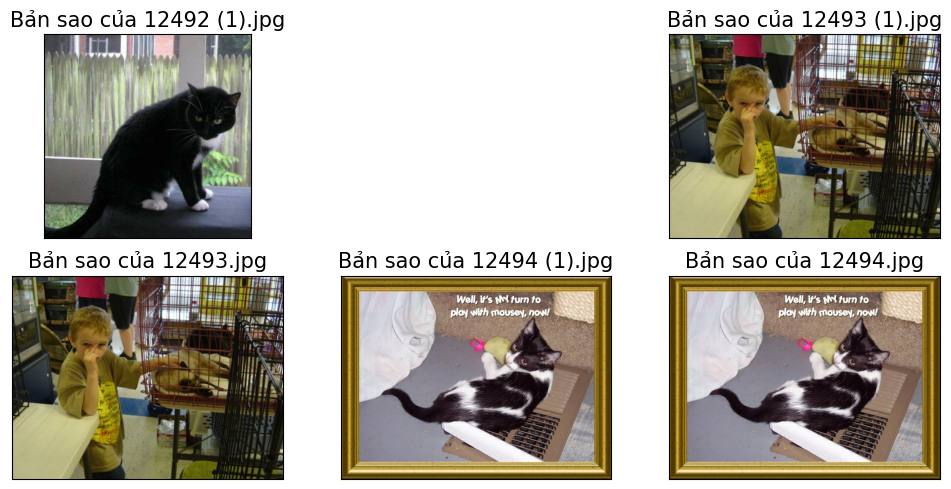

In [14]:
import matplotlib.pyplot as plt
import os
import tensorflow as tf

fig = plt.figure(figsize=(10, 5))  # Tạo figure có kích thước 10x5 inch

for i, file in enumerate(file_list):  # Duyệt qua danh sách các file ảnh
    img_raw = tf.io.read_file(file)  # Đọc nội dung file (dưới dạng nhị phân)
    img = tf.image.decode_image(img_raw)  # Giải mã ảnh (JPEG/PNG...)

    print('Image Size: ', img.shape)  # In ra kích thước ảnh (cao, rộng, kênh)

    ax = fig.add_subplot(2, 3, i + 1)  # Thêm ảnh vào figure: 2 hàng, 3 cột
    ax.set_xticks([]); ax.set_yticks([])  # Tắt nhãn trục X và Y
    ax.imshow(img)  # Hiển thị ảnh
    ax.set_title(os.path.basename(file), size=15)  # Đặt tiêu đề là tên file

# plt.savefig('images/13_1.png', dpi=300)  # Nếu muốn lưu ảnh thì bỏ comment dòng này

plt.tight_layout()  # Tự động điều chỉnh layout cho gọn gàng
plt.show()  # Hiển thị toàn bộ ảnh trong figure


In [15]:
labels = [1 if 'dogs' in os.path.basename(file) else 0 for file in file_list]
print(labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [17]:
ds_file_labels = tf.data.Dataset.from_tensor_slices((file_list, labels))
for item in ds_file_labels:
  print(item[0].numpy(), item[1].numpy())

b'/content/drive/MyDrive/cat_dog_images/Ba\xcc\x89n sao cu\xcc\x89a 12492 (1).jpg' 0
b'/content/drive/MyDrive/cat_dog_images/Ba\xcc\x89n sao cu\xcc\x89a 12492.jpg' 0
b'/content/drive/MyDrive/cat_dog_images/Ba\xcc\x89n sao cu\xcc\x89a 12493 (1).jpg' 0
b'/content/drive/MyDrive/cat_dog_images/Ba\xcc\x89n sao cu\xcc\x89a 12493.jpg' 0
b'/content/drive/MyDrive/cat_dog_images/Ba\xcc\x89n sao cu\xcc\x89a 12494 (1).jpg' 0
b'/content/drive/MyDrive/cat_dog_images/Ba\xcc\x89n sao cu\xcc\x89a 12494.jpg' 0
b'/content/drive/MyDrive/cat_dog_images/Ba\xcc\x89n sao cu\xcc\x89a 12495 (1).jpg' 0
b'/content/drive/MyDrive/cat_dog_images/Ba\xcc\x89n sao cu\xcc\x89a 12495.jpg' 0
b'/content/drive/MyDrive/cat_dog_images/Ba\xcc\x89n sao cu\xcc\x89a 12496 (1).jpg' 0
b'/content/drive/MyDrive/cat_dog_images/Ba\xcc\x89n sao cu\xcc\x89a 12496.jpg' 0
b'/content/drive/MyDrive/cat_dog_images/Ba\xcc\x89n sao cu\xcc\x89a 12498 (1).jpg' 0
b'/content/drive/MyDrive/cat_dog_images/Ba\xcc\x89n sao cu\xcc\x89a 12498.jpg' 0
b'/c

0: /content/drive/MyDrive/cat_dog_images/Bản sao của 12492 (1).jpg - Image Size: (471, 480, 3)
❌ Error reading file: /content/drive/MyDrive/cat_dog_images/Bản sao của 12492.jpg
{{function_node __wrapped__ReadFile_device_/job:localhost/replica:0/task:0/device:CPU:0}} /content/drive/MyDrive/cat_dog_images/Bản sao của 12492.jpg; No such file or directory [Op:ReadFile]
2: /content/drive/MyDrive/cat_dog_images/Bản sao của 12493 (1).jpg - Image Size: (375, 500, 3)
3: /content/drive/MyDrive/cat_dog_images/Bản sao của 12493.jpg - Image Size: (375, 500, 3)
4: /content/drive/MyDrive/cat_dog_images/Bản sao của 12494 (1).jpg - Image Size: (369, 492, 3)
5: /content/drive/MyDrive/cat_dog_images/Bản sao của 12494.jpg - Image Size: (369, 492, 3)
6: /content/drive/MyDrive/cat_dog_images/Bản sao của 12495 (1).jpg - Image Size: (377, 500, 3)
❌ Error reading file: /content/drive/MyDrive/cat_dog_images/Bản sao của 12495 (1).jpg
num must be an integer with 1 <= num <= 6, not 7
7: /content/

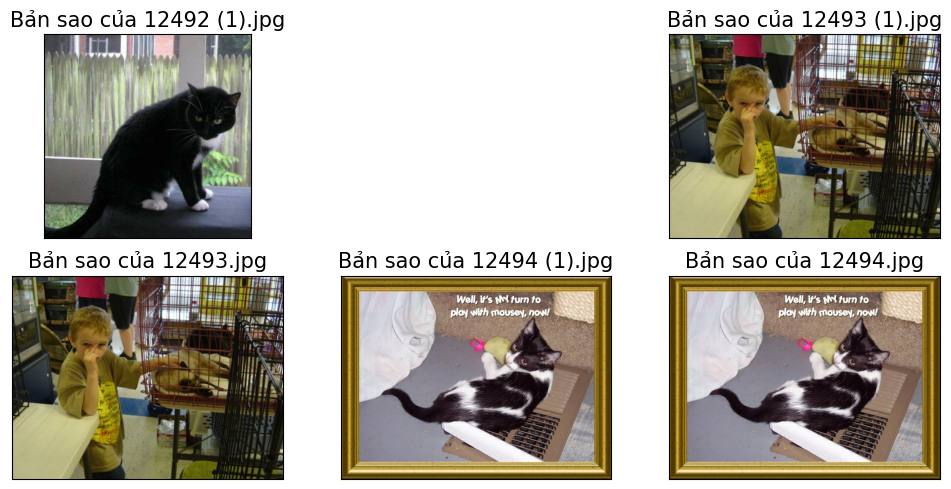

In [19]:
def load_and_preprocess(path, label):
    image = tf.io.read_file(path)  # Đọc file ảnh từ đường dẫn
    image = tf.image.decode_jpeg(image, channels=3)  # Giải mã JPEG thành tensor ảnh RGB
    image = tf.image.resize(image, [img_height, img_width])  # Resize ảnh về kích thước chuẩn
    image /= 255.0  # Chuẩn hóa giá trị pixel từ [0,255] về [0,1]

    return image, label

img_width, img_height = 120, 80  # Đặt kích thước ảnh đầu ra

ds_images_labels = ds_file_labels.map(load_and_preprocess)  # Ánh xạ hàm tiền xử lý lên dataset

fig = plt.figure(figsize=(10, 5))  # Tạo figure để hiển thị ảnh

for i, example in enumerate(ds_images_labels):  # Lặp qua các ảnh đã xử lý
    print(example[0].shape, example[1].numpy())  # In kích thước ảnh và nhãn

    ax = fig.add_subplot(2, 3, i + 1)  # Tạo subplot (2 hàng, 3 cột)
    ax.set_xticks([]); ax.set_yticks([])  # Tắt trục
    ax.imshow(example[0])  # Hiển thị ảnh
    ax.set_title('{}'.format(example[1].numpy()), size=15)  # Hiển thị nhãn ảnh

plt.tight_layout()
plt.show()
